In [17]:
using DelimitedFiles
using Dates
using PyPlot
const plt = PyPlot

PyPlot

In [58]:
dateinit = Date(2020, 3, 15)
dateend = Date(2022, 9, 1)
data = readdlm("/home/ctroupin/COVID19BE_MORT.csv", ',', skipstart=1);
dates = Date.(data[:,1], "yyyy-mm-dd")
death = data[:,5];

color1 = "#1b9e77"
color2 = "#d95f02"
color3 = "#7570b3"

"#7570b3"

In [27]:
years = Dates.year.(dates)
months = Dates.month.(dates)
dateseq = dateinit:Dates.Day(1):dateend
ndeath = zeros(length(dateseq))
for (iii, dd) in enumerate(dateseq)
    gooddates = findall(dates.== dd)
    @debug(length(gooddates))
    if length(gooddates) > 0
        ndeath[iii] = sum(death[gooddates])
    end
end

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


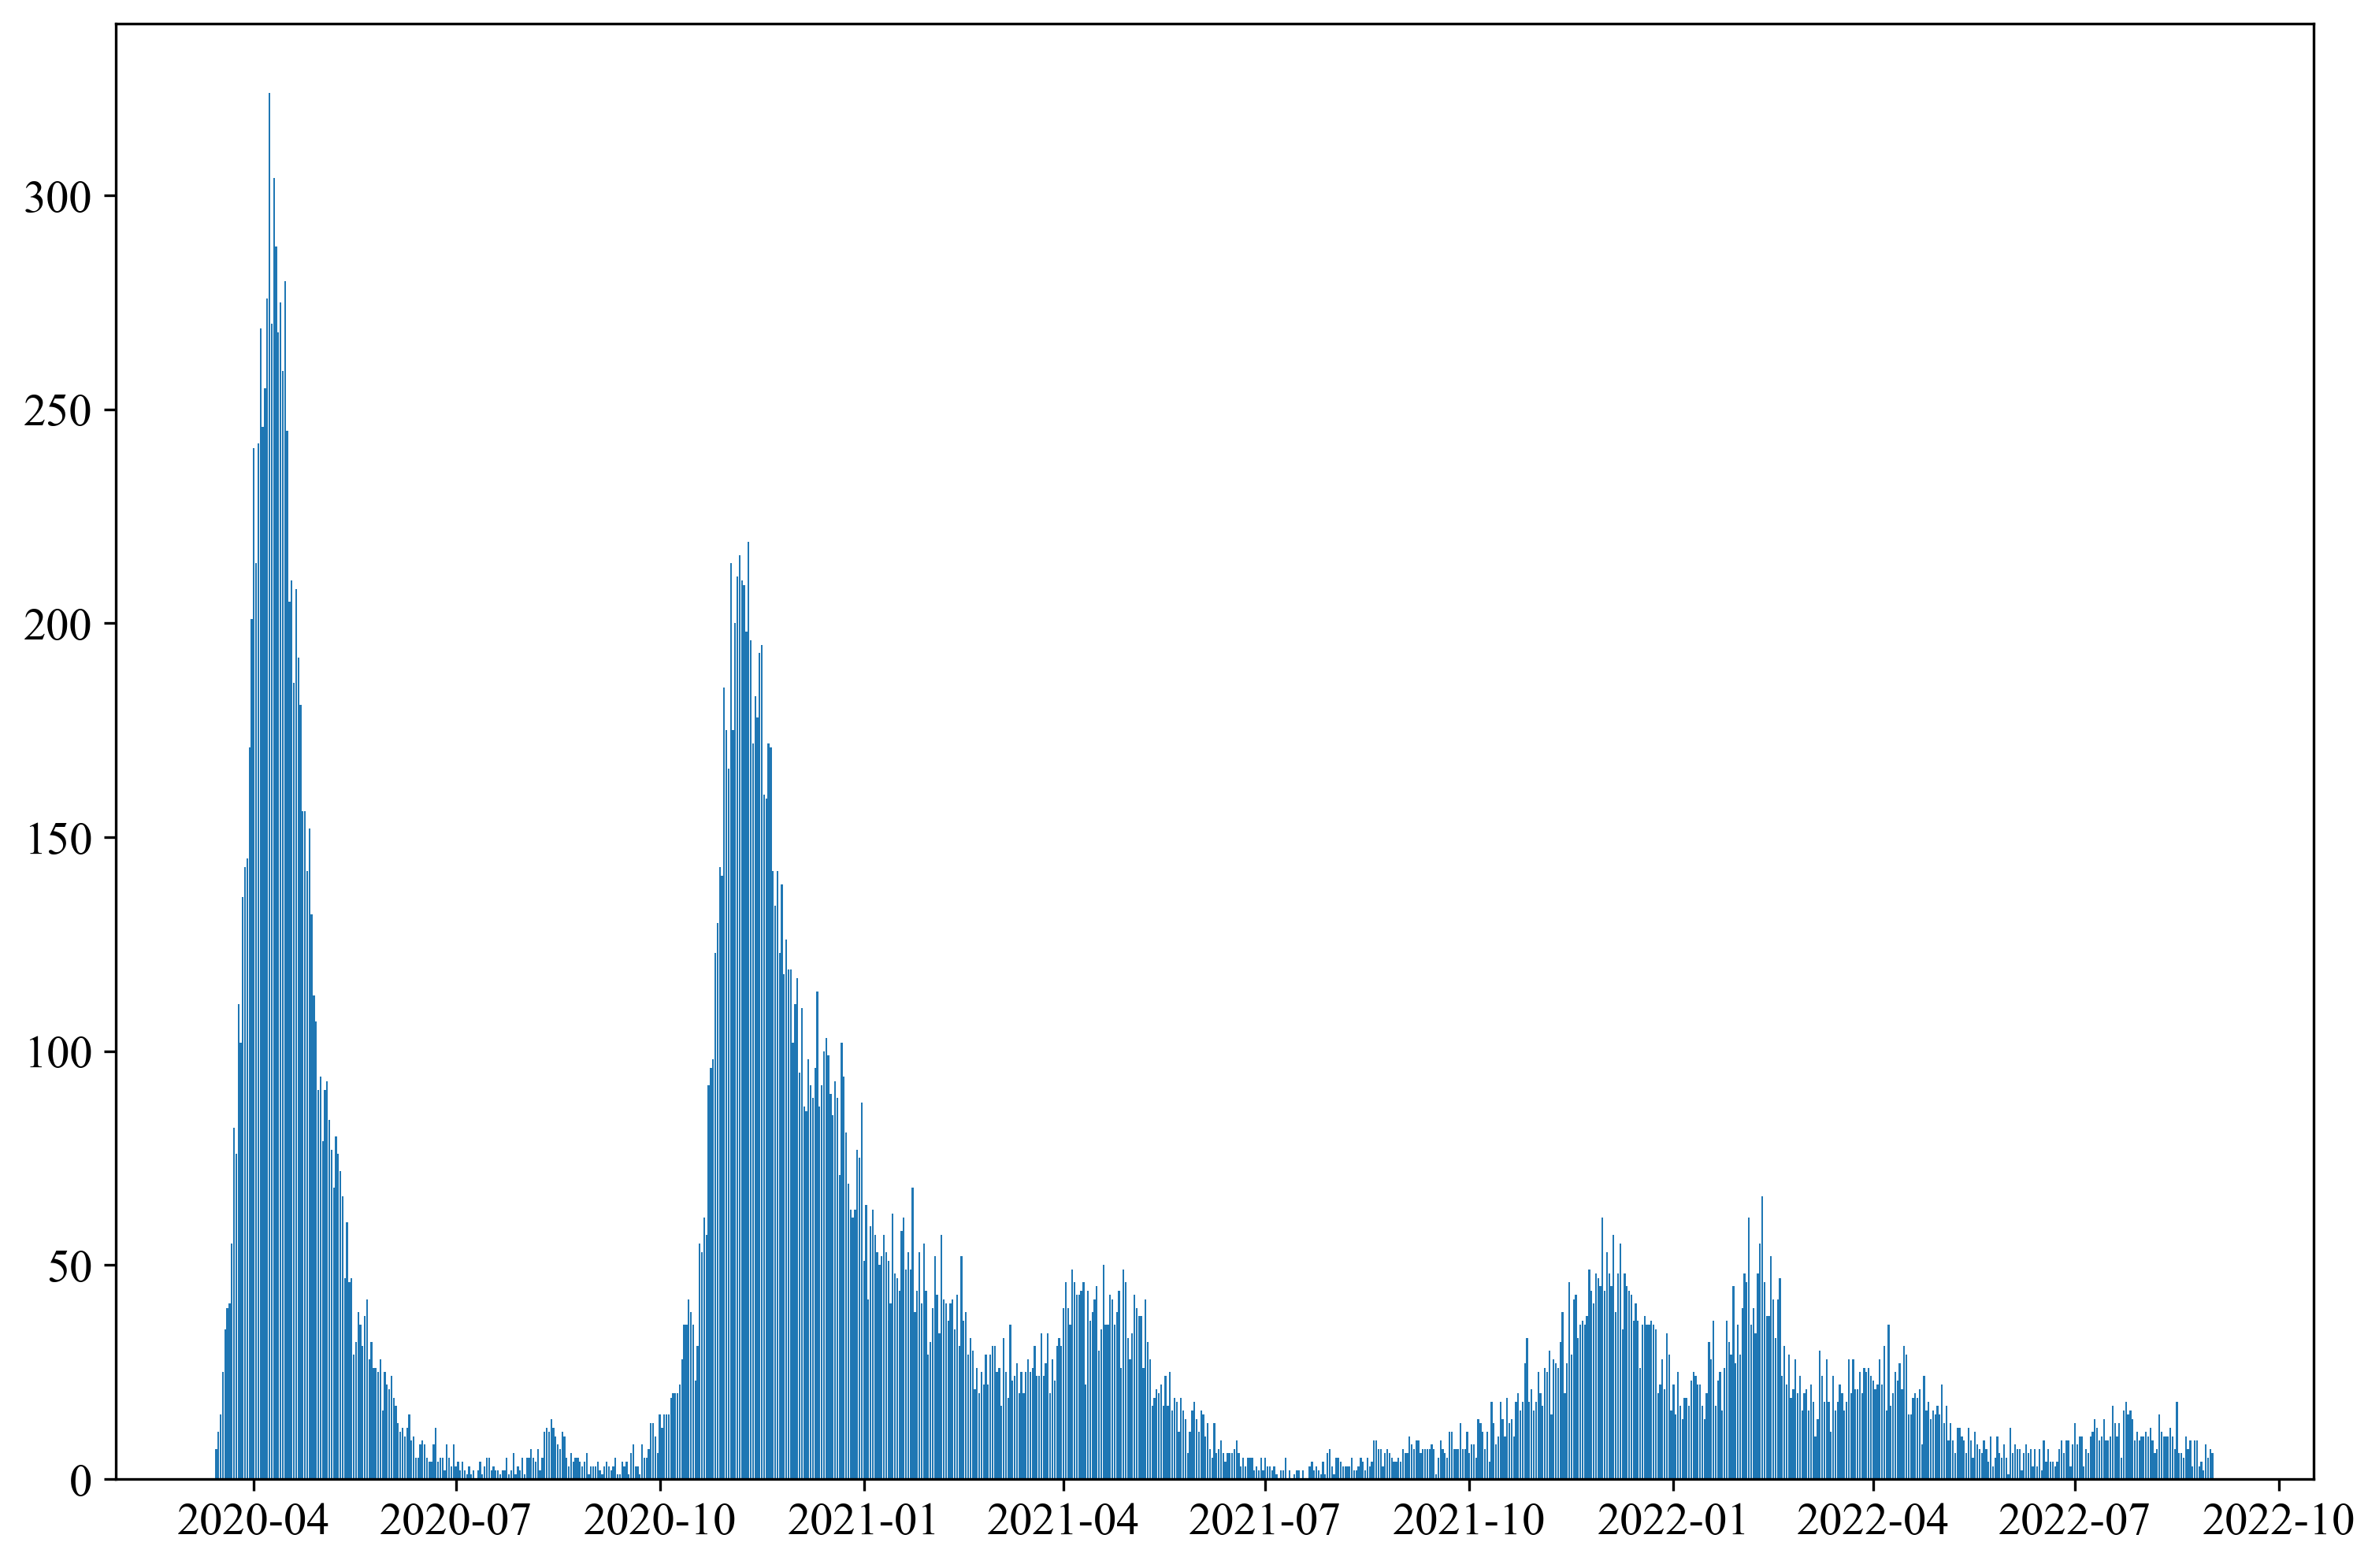

In [29]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
ax.bar(dateinit:Dates.Day(1):dateend, ndeath)
plt.show()

In [49]:
dateseqmonth = Date(2020, 1, 1):Dates.Month(1):Date(2022, 12, 1)
ndeathmonth = zeros(length(dateseqmonth))
for (iii, dd) in enumerate(dateseqmonth)
    gooddates = findall( (years.== Dates.year(dd)) .& (months.== Dates.month(dd)) )
    @debug(length(gooddates))
    if length(gooddates) > 0
        ndeathmonth[iii] = sum(death[gooddates])
    end
end

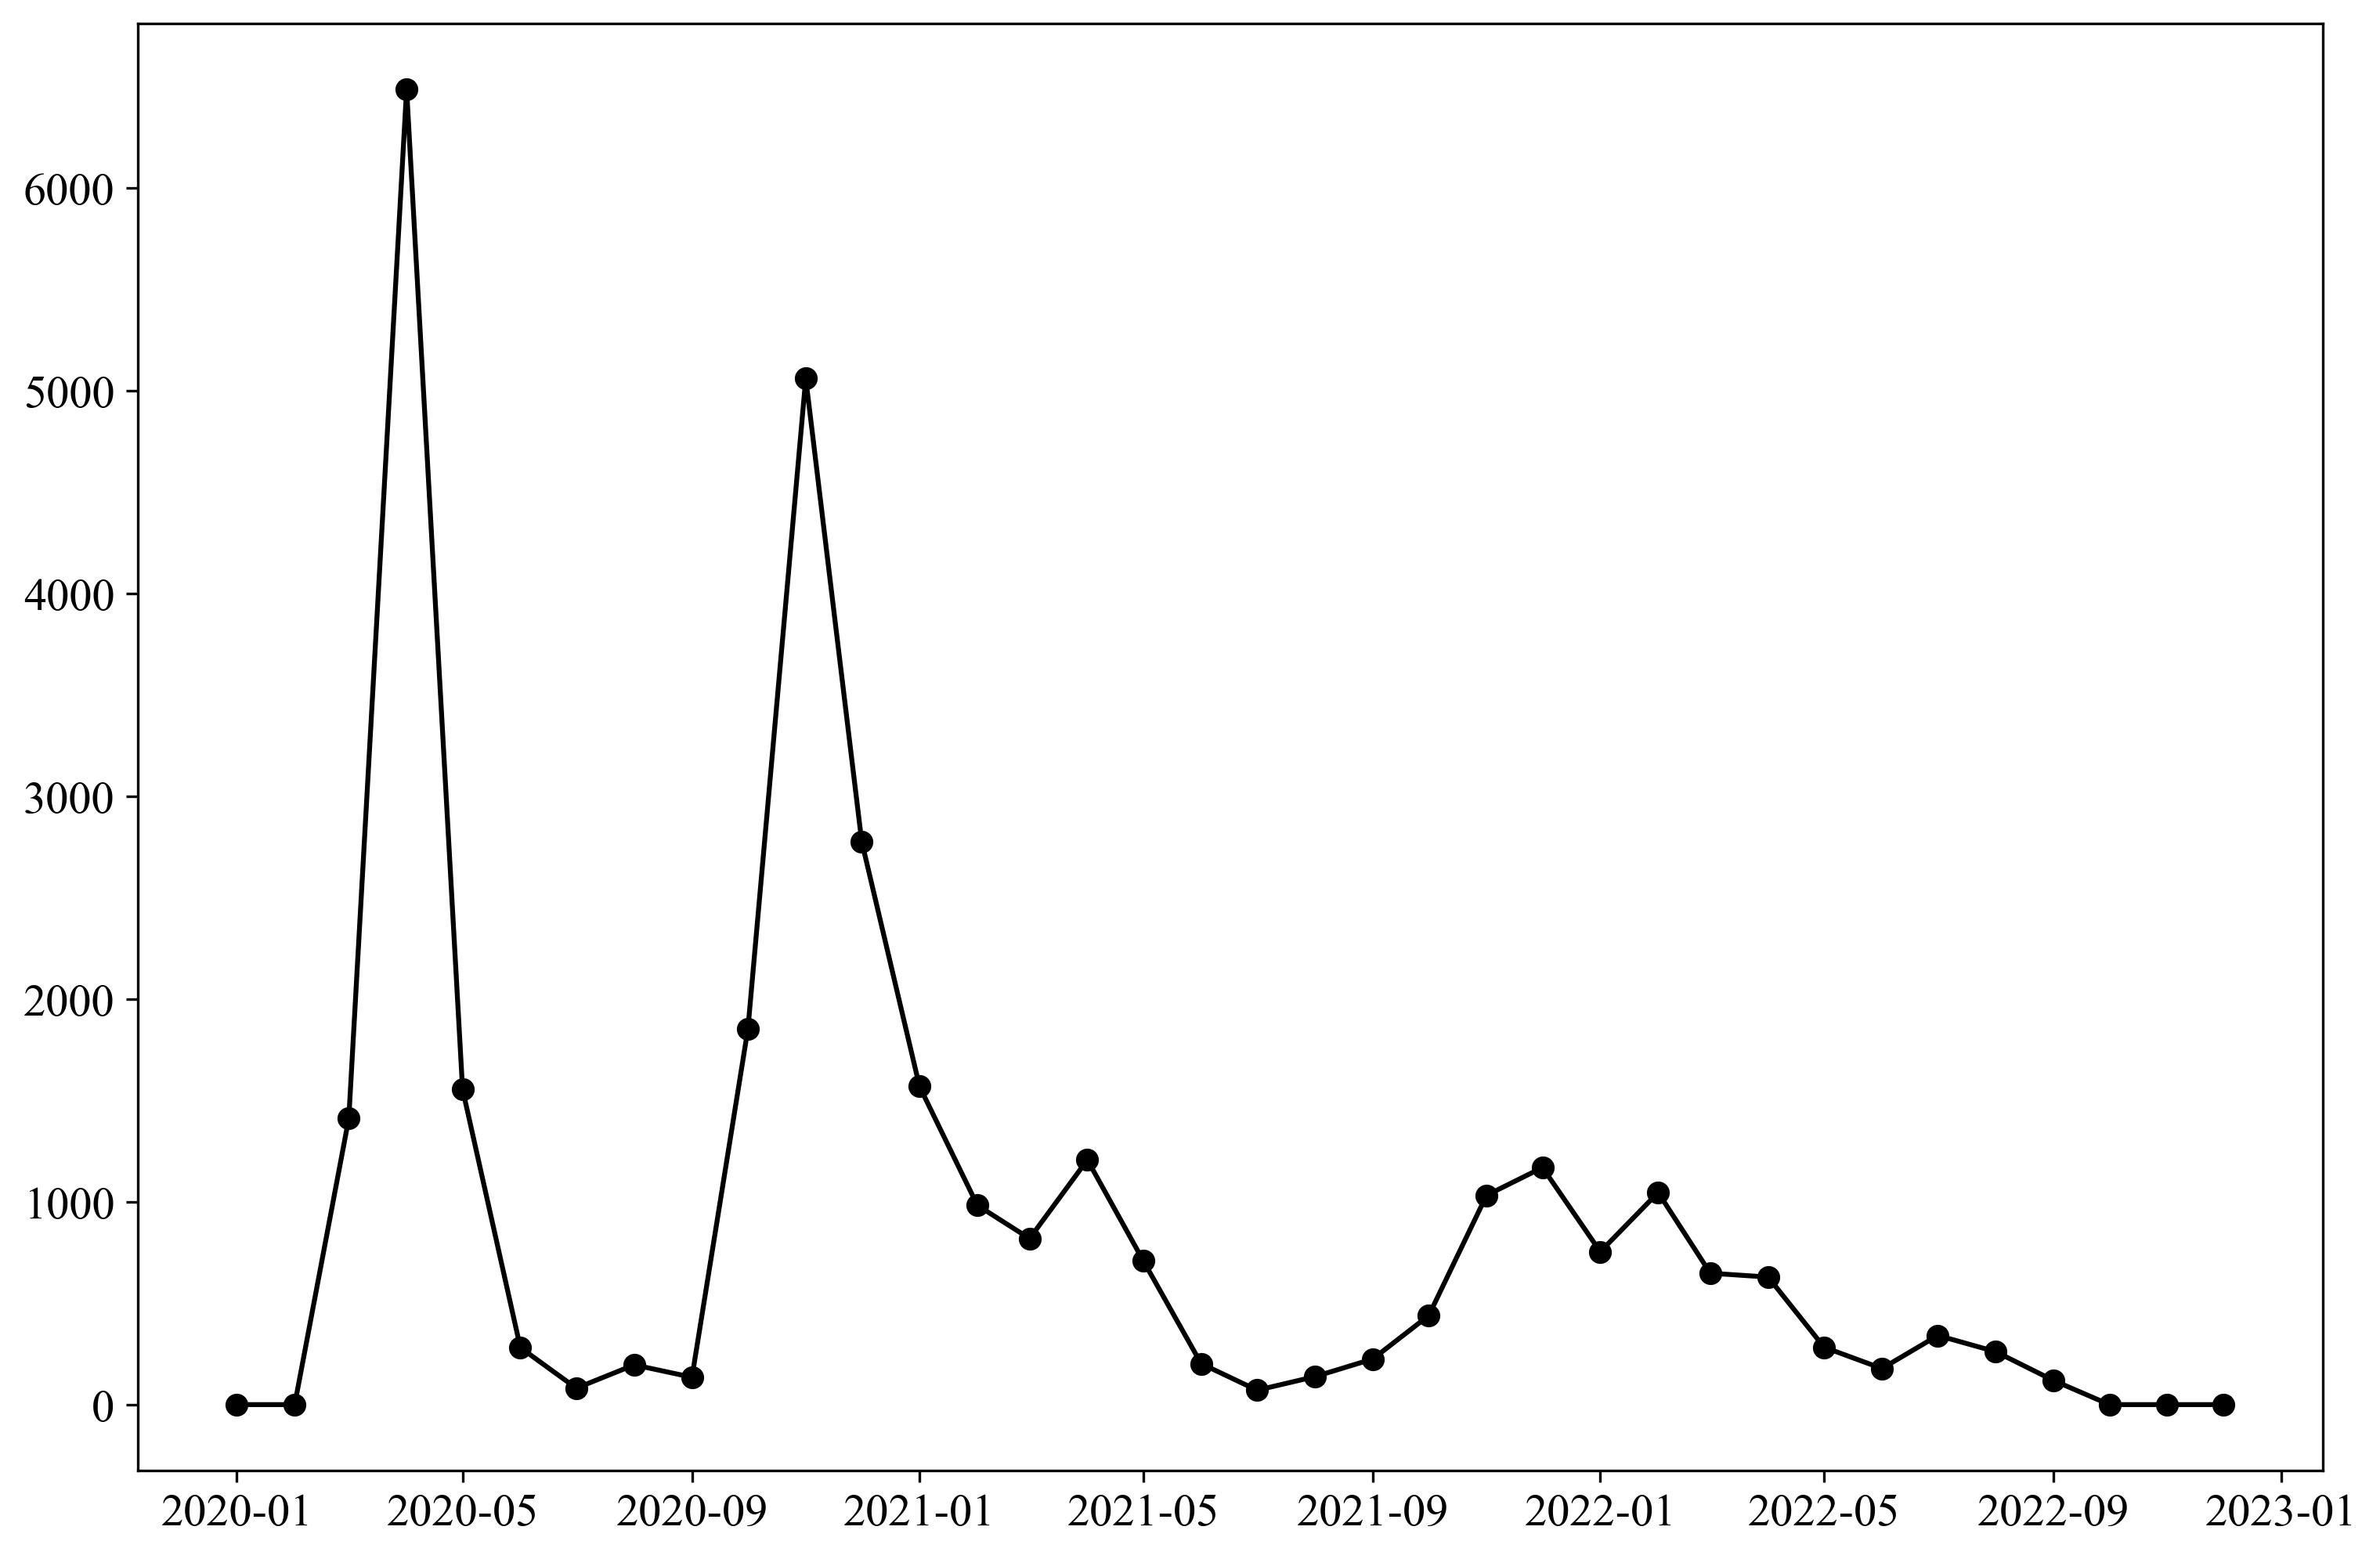

In [56]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
ax.plot(dateseqmonth, ndeathmonth, "ko-")
plt.show()

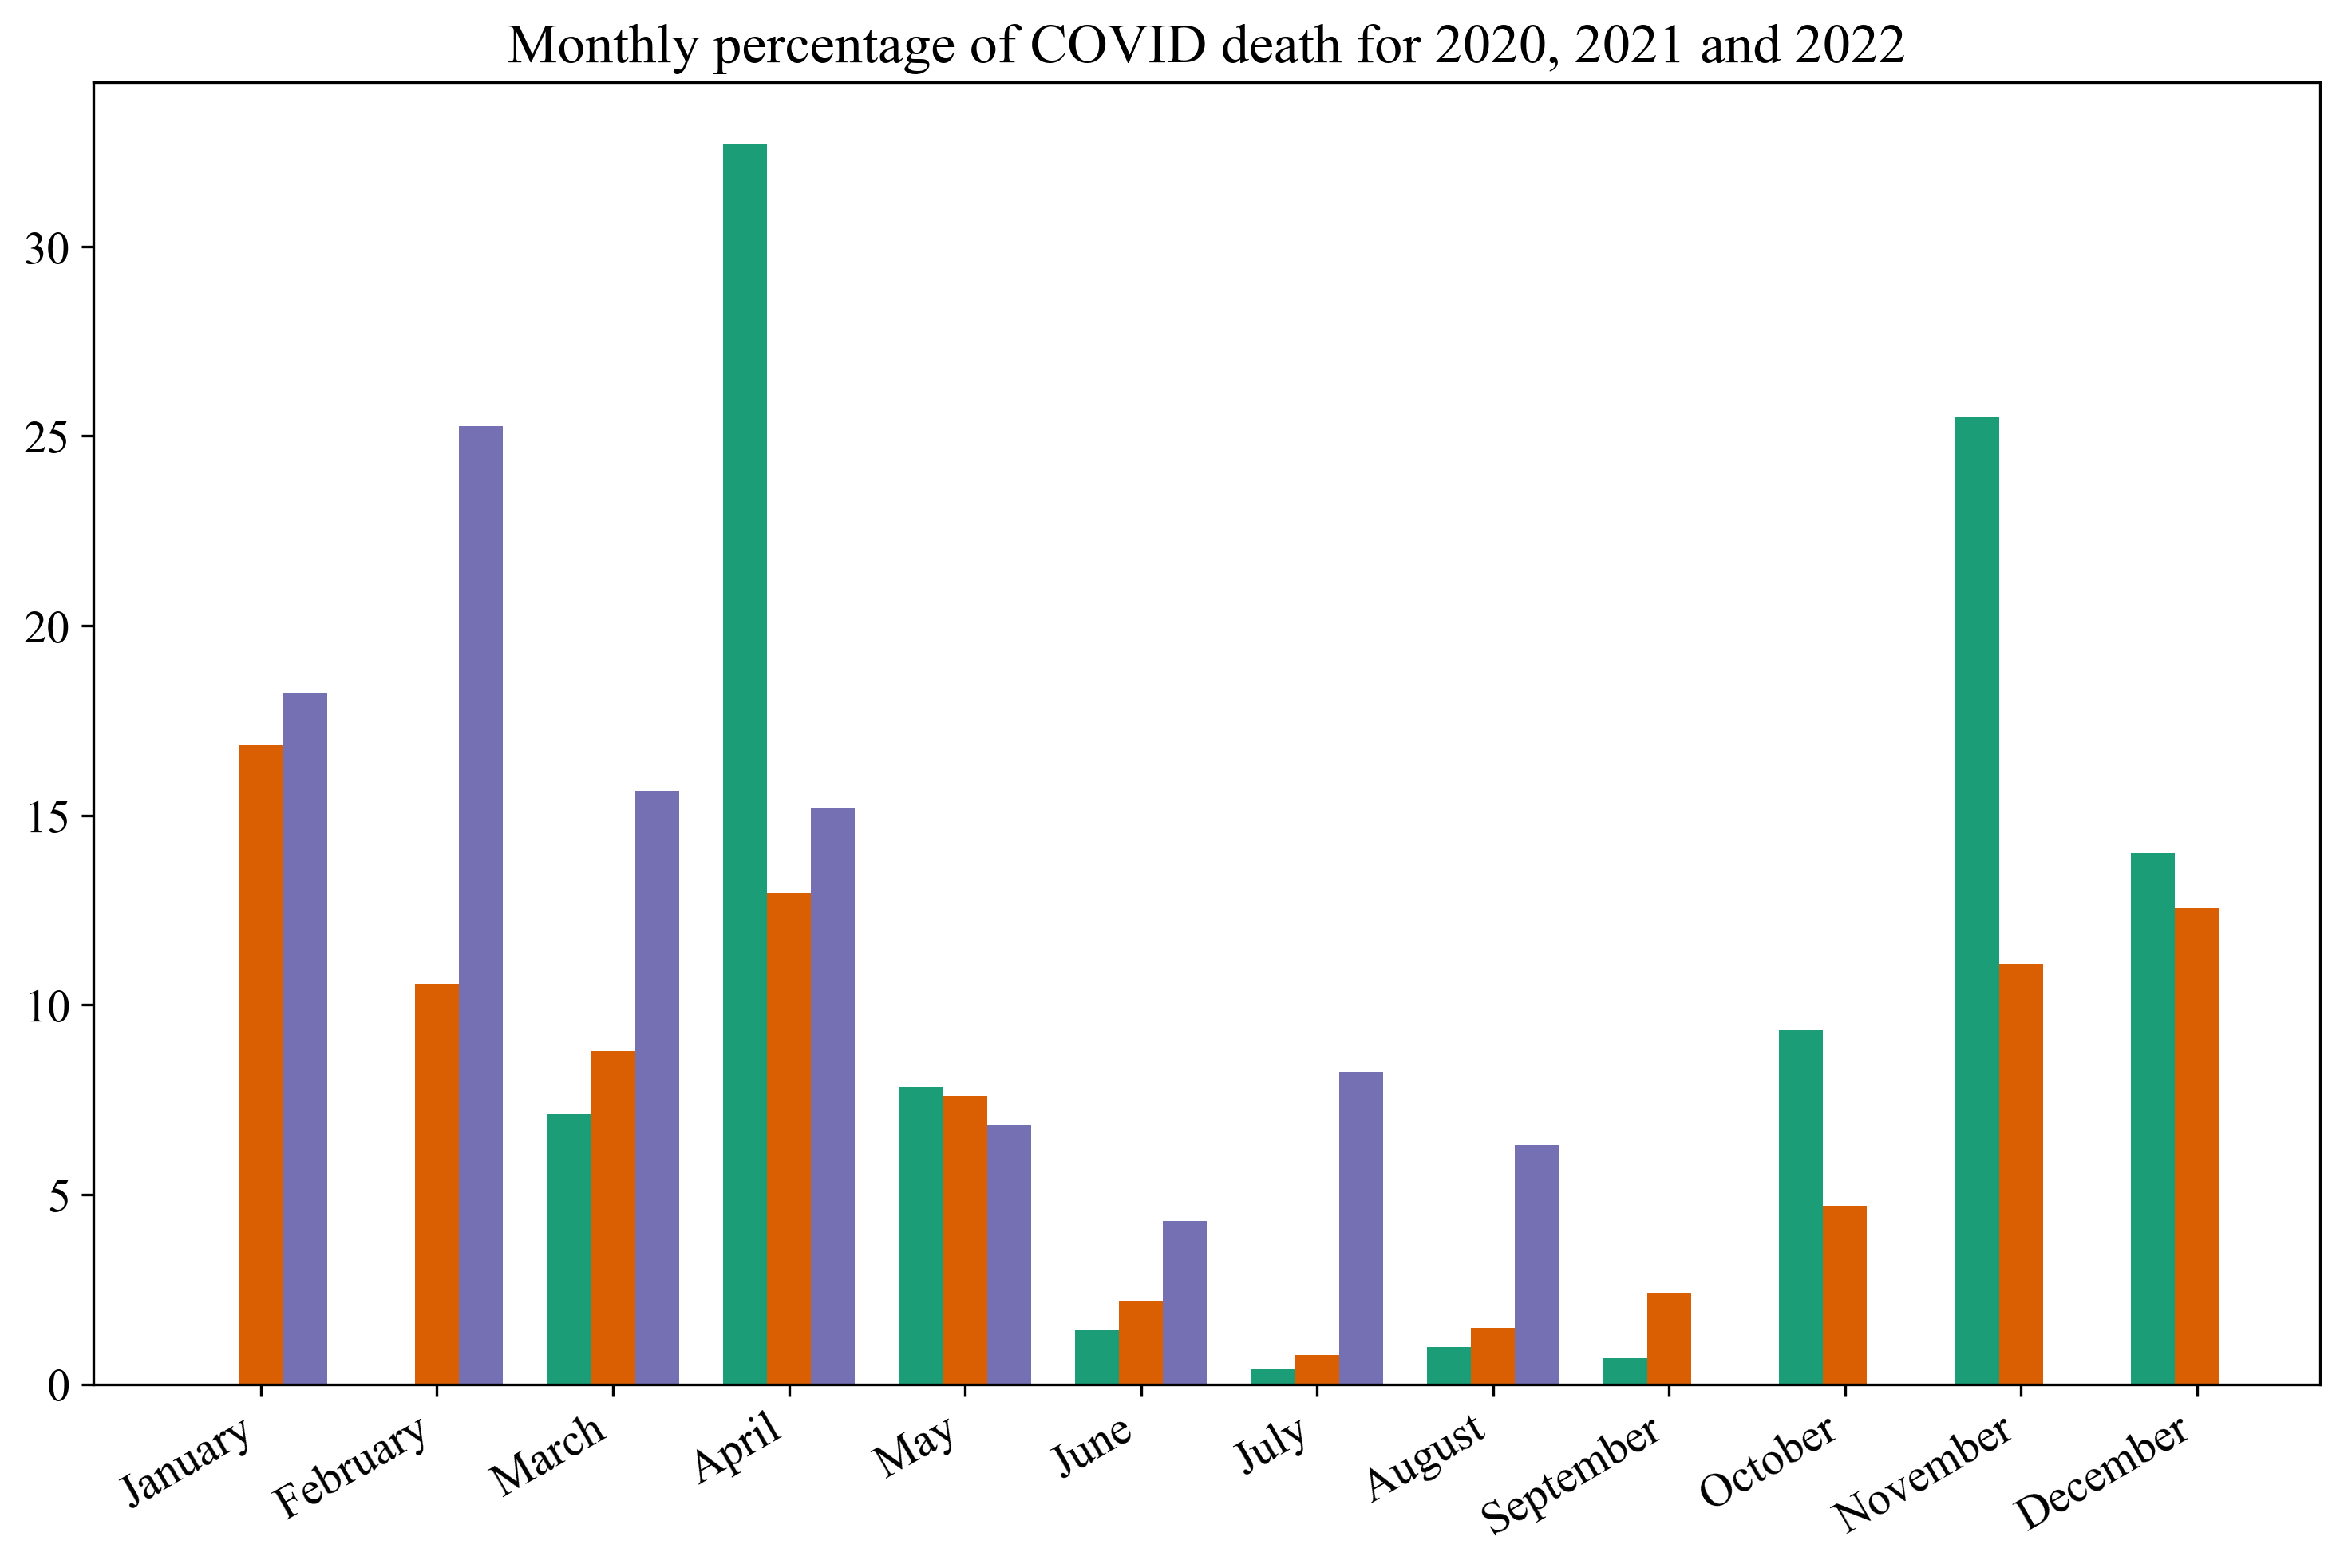

In [84]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
ax.bar(collect(1:12) .- 0.25, 100 .* ndeathmonth[1:12] ./ sum(ndeathmonth[1:12]), color=color1, width=.25)
ax.bar(collect(1:12) .+ 0., 100 * ndeathmonth[13:24] ./ sum(ndeathmonth[13:25]), color=color2, width=.25)
ax.bar(collect(1:8) .+ 0.25, 100 * ndeathmonth[25:32] ./ sum(ndeathmonth[25:32]), color=color3, width=.25)
ax.set_xticks(1:12)
ax.set_xticklabels(Dates.monthname.(1:12))
fig.autofmt_xdate()
ax.set_title("Monthly percentage of COVID death for 2020, 2021 and 2022")
plt.show()

In [40]:
ndeathmonth[findall(dateseqmonth .== Date(2020, 6, 1))], ndeathmonth[findall(dateseqmonth .== Date(2021, 6, 1))], 
ndeathmonth[findall(dateseqmonth .== Date(2022, 6, 1))]

([281.0], [202.0], [178.0])

In [41]:
ndeathmonth[findall(dateseqmonth .== Date(2020, 7, 1))], ndeathmonth[findall(dateseqmonth .== Date(2021, 7, 1))], 
ndeathmonth[findall(dateseqmonth .== Date(2022, 7, 1))]

([81.0], [71.0], [341.0])

In [51]:
ndeathmonth[findall(dateseqmonth .== Date(2020, 8, 1))], ndeathmonth[findall(dateseqmonth .== Date(2021, 8, 1))], 
ndeathmonth[findall(dateseqmonth .== Date(2022, 8, 1))]

([196.0], [138.0], [261.0])

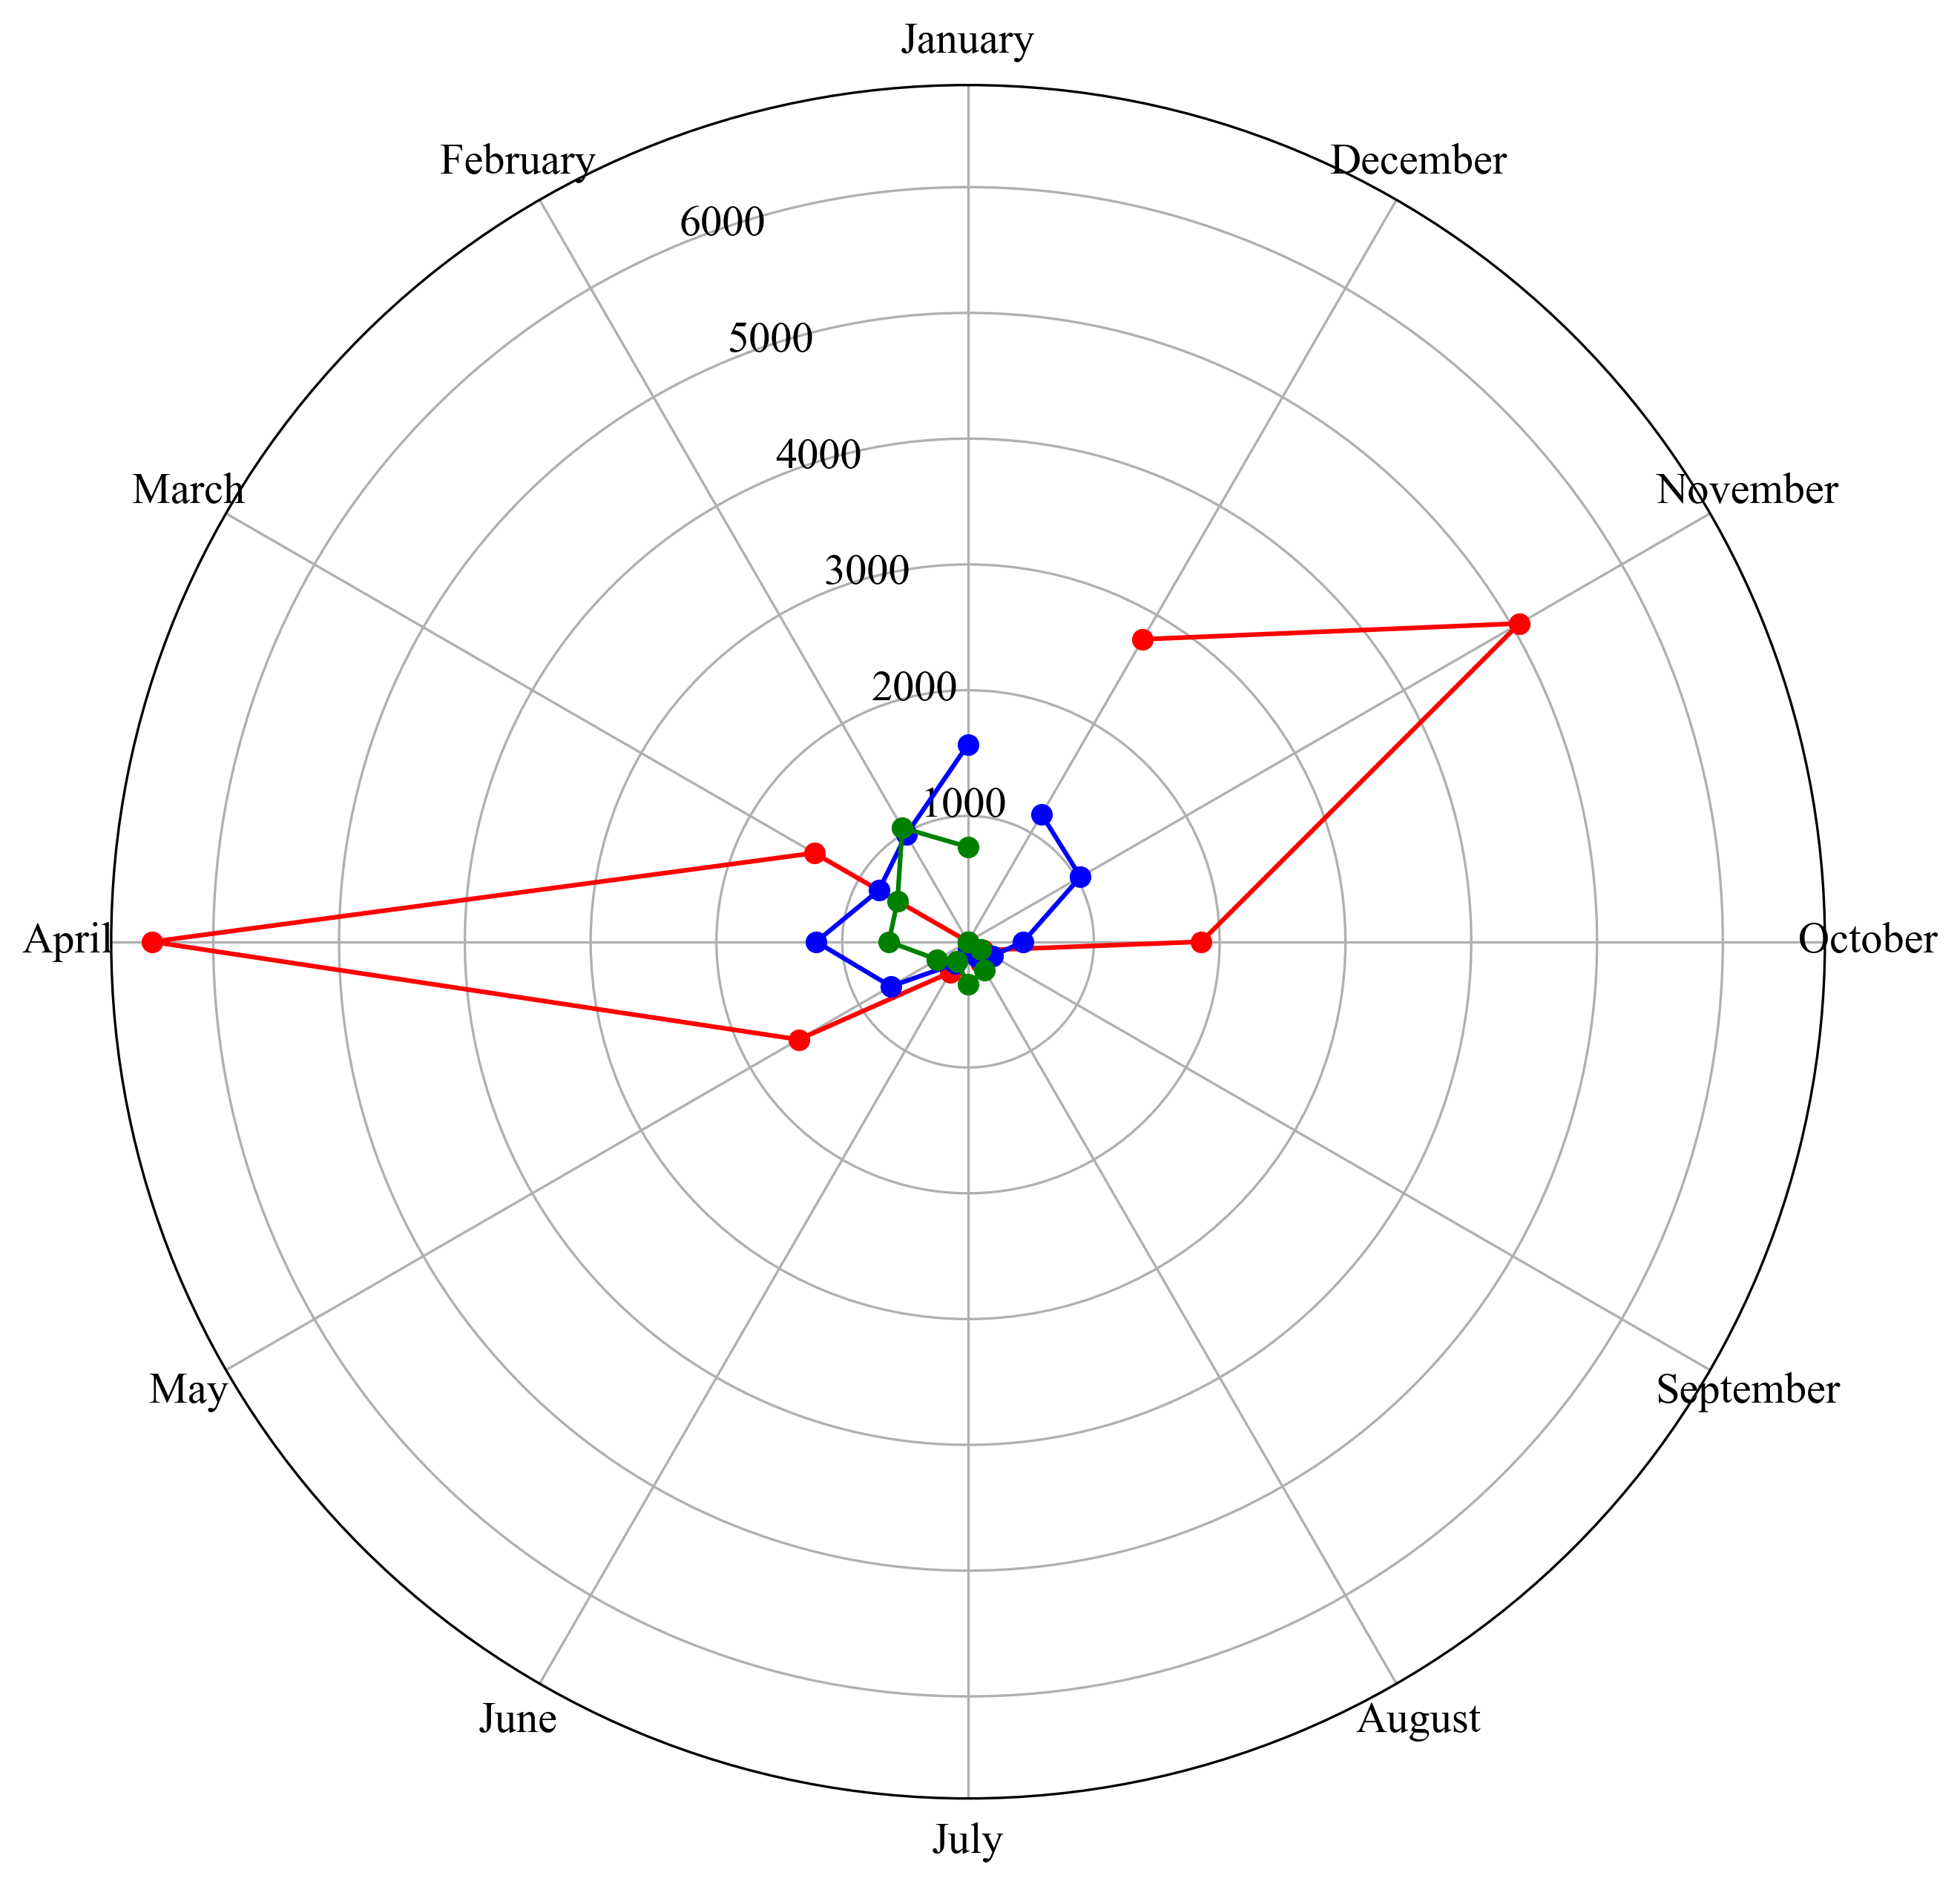

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb6e18fe090>

In [55]:
N = 12
theta = LinRange(0, 2 * π - π/6, N)
width = (1.8 * π) / N
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=true)
ax.set_thetagrids(collect(0:30:330), Dates.monthname.(1:12), color="k")
ax.set_theta_zero_location("N")
ax.plot(theta, ndeathmonth[1:12], "ro-")
ax.plot(theta, ndeathmonth[13:24], "bo-")
ax.plot(theta, ndeathmonth[25:36], "go-")
# plt.close()

In [ ]:
nde